# FINAL PROJECT SUBMISSION

- Student Name: Ian Korir
- Student Pase: Fulltime-Hybrid student
- Scheduled Project Review: 22/03/2024
- Instructor Name: Nikita Njoroge
- Blog Post: 

# Introduction
## Overview
Business Problem:
Viusasa new movie studio aims to establish itself as a leading player in the entertainment industry by producing high-quality and commercially successful movies. However, the studio faces the challenge of navigating the complexities of the movie market to ensure its productions resonate with audiences and generate significant revenue.


Problem Statement: How can Viusasa's new movie studio strategically optimize its production and release strategy to maximize box office success and audience satisfaction?

## Objectives
Key Objectives:
1.	Identify the most profitable and audience-friendly movie genres to prioritize in production efforts.
2.	Determine the optimal timing for movie releases to maximize audience turnout and box office revenue.
3.	Enhance audience engagement and satisfaction by aligning movie offerings with audience preferences and expectations.

## The Data
The datasets are stored in the 'zippedData' folder which were sourced from:
1.	Box Office MojoLinks : 
	bom.movie_gross.csv
2.	IMDBLinks : 
	im.db
3.	Rotten TomatoesLinks : 
	rt.movie_info.tsv
4.	TheMovieDBLinks : 
	tmdb.movies.csv
5.	The Numbers :
	tn.movie_budgets.csv




## Import relevant libraries


In [221]:
#importing libraries
import pandas as pd
import sqlite3
import csv
import matplotlib.pyplot as plt

## Exploring Datasets

## Numbers Dataset
This gives us information about budget and returns

In [222]:
# read movie budget csv file
movie_budget = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

# get summary of the dataframe
movie_budget.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


Check for missing values

In [223]:
# check for missing values
movie_budget.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

The movie budget Data frame has 5,782 rows and 6 columns namely: id,release_date, movie, production_budget, domestic gross and worldwide_gross. The data types are as float,object and int. The are no null values.

Clean data by changing data type to float

In [224]:
#Cast to numeric data type
movie_budget['production_budget'] = movie_budget['production_budget'].replace('[^.0-9]', '', regex=True).astype('float32')
movie_budget['domestic_gross'] = movie_budget['domestic_gross'].replace('[^.0-9]', '', regex=True).astype('float32')
movie_budget['worldwide_gross'] = movie_budget['worldwide_gross'].replace('[^.0-9]', '',regex = True).astype('float64')
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507648.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063872.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762352.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005856.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181376.0,1.316722e+09


The release date is an object, in order to filter the years convert to date time.

In [225]:
#converting release data object to dateTime
movie_budget['release_date'] = pd.to_datetime(movie_budget['release_date'], errors='coerce')
movie_budget['year'] = movie_budget['release_date'].dt.strftime('%Y')
movie_budget.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,1,2009-12-18,Avatar,425000000.0,760507648.0,2.776345e+09,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063872.0,1.045664e+09,2011
2,3,2019-06-07,Dark Phoenix,350000000.0,42762352.0,1.497624e+08,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005856.0,1.403014e+09,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181376.0,1.316722e+09,2017
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662208.0,2.053311e+09,2015
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815488.0,2.048134e+09,2018
7,8,2007-05-24,Pirates of the Caribbean: At Worldâs End,300000000.0,309420416.0,9.634204e+08,2007
8,9,2017-11-17,Justice League,300000000.0,229024288.0,6.559452e+08,2017
9,10,2015-11-06,Spectre,300000000.0,200074176.0,8.796209e+08,2015


Finding the percentage profits of the movies based on the production budget and the world wide gross.

In [226]:
# calculate the profits or loss for each movie
movie_budget['profit/loss'] = movie_budget['worldwide_gross'] - movie_budget['production_budget']

# Calculate profit/loss as a percentage
movie_budget['profit/loss_percentage'] = (movie_budget['profit/loss'] / movie_budget['production_budget']) * 100

movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,profit/loss,profit/loss_percentage
0,1,2009-12-18,Avatar,425000000.0,760507648.0,2.776345e+09,2009,2.351345e+09,553.257713
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063872.0,1.045664e+09,2011,6.350639e+08,154.667286
2,3,2019-06-07,Dark Phoenix,350000000.0,42762352.0,1.497624e+08,2019,-2.002376e+08,-57.210757
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005856.0,1.403014e+09,2015,1.072414e+09,324.384139
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181376.0,1.316722e+09,2017,9.997217e+08,315.369636


Check movies with the highest profit

In [227]:
# Group by 'year' and 'movie', summing the profits for each group
profit_by_year_movie = movie_budget.groupby(['year', 'movie'])['profit/loss'].sum().reset_index()

# Sort the DataFrame by profit in descending order for each year
sorted_profit_by_year_movie = profit_by_year_movie.sort_values(by=['year', 'profit/loss'], ascending=[False, False])

# Display the top 10 highest profit movies for each year
top_10_profit_by_year_movie = sorted_profit_by_year_movie.groupby('year').head(10)
#top_10_profit_by_year_movie

# Filter the data to include years from 2011 to the present
filtered_data = top_10_profit_by_year_movie[top_10_profit_by_year_movie['year'] >= '2011']
filtered_data


,year,movie,profit/loss
5779,2020,Hannibal the Conqueror,-50000000.0
5778,2020,Call of the Wild,-82000000.0
5780,2020,Moonfall,-150000000.0
5722,2019,Captain Marvel,948061550.0
5714,2019,Aladdin,437234314.0
...,...,...,...
3969,2011,Kung Fu Panda 2,514837547.0
4061,2011,The Hangover Part II,506464305.0
3923,2011,Fast Five,505163454.0
4079,2011,The Smurfs,453749323.0


graph showing the  profit and loss for movies between years 2019 and 2020,

h:\MORINGA\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
h:\MORINGA\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
h:\MORINGA\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 148 (\x94) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


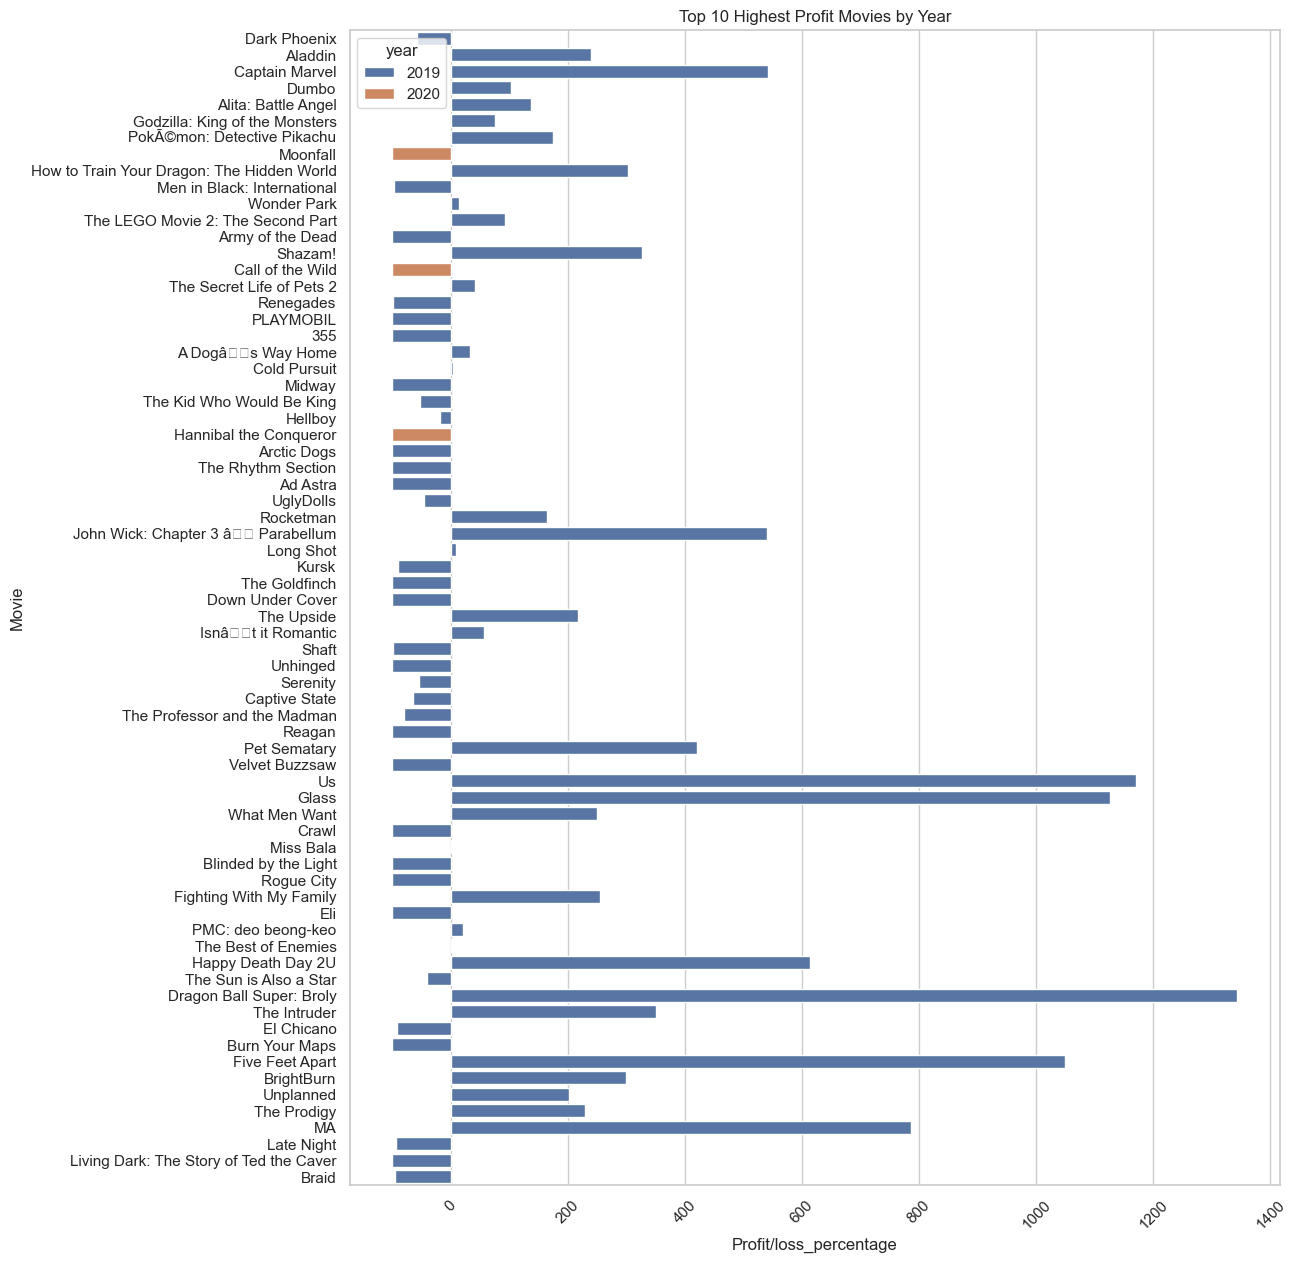

In [228]:
import seaborn as sns
# Filter the data for the years 2020 and 2019
filtered_data = movie_budget[(movie_budget['year'] >= '2019')]

# Set the style of the plot
sns.set(style="whitegrid")

# Initialize the matplotlib figure
plt.figure(figsize=(12, 15))

# Plot the data using seaborn's barplot
sns.barplot(data=filtered_data, x='profit/loss_percentage', y='movie', hue='year', dodge=False)

# Set the title and labels
plt.title('Top 10 Highest Profit Movies by Year')
plt.xlabel('Profit/loss_percentage')
plt.ylabel('Movie')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


## IMDB Dataset

In [229]:
# connect to sql database
conn = sqlite3.connect('zippedData/im.db')
cur = conn.cursor() 

Find table names in the database

In [230]:
table_name_query = """SELECT name 
                      AS 'Table Names' 
                      FROM sqlite_master 
                      WHERE type='table';"""

pd.read_sql(table_name_query, conn)

,Table Names
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


There are 8 tables in the database. We are highly interested in the movie_basics  and the movie_ratings tables in order to draw our conclusions on highly rated movie genres

In [266]:
# query data from music basics table
movie_basics = """SELECT *
                    FROM movie_basics;"""

movie_basics = pd.read_sql(movie_basics, conn)
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [232]:
# query data from movie ratings table
movie_ratings = """SELECT * 
                    FROM movie_ratings;
                    """
movie_ratings = pd.read_sql(movie_ratings, conn).head(10)
movie_ratings
                    

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571
8,tt1156528,7.2,265
9,tt1161457,4.2,148


Join the two table by the movie ID that  is common to both tables.

In [233]:
ratings = """SELECT primary_title, movie_id, start_year, runtime_minutes, genres, averagerating, numvotes
                FROM movie_basics
                JOIN movie_ratings
                USING(movie_id)
                LIMIT 10
                ;"""

ratings = pd.read_sql_query(ratings, conn)
ratings

,primary_title,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes
0,Sunghursh,tt0063540,2013,175.0,"Action,Crime,Drama",7.0,77
1,One Day Before the Rainy Season,tt0066787,2019,114.0,"Biography,Drama",7.2,43
2,The Other Side of the Wind,tt0069049,2018,122.0,Drama,6.9,4517
3,Sabse Bada Sukh,tt0069204,2018,NaN,"Comedy,Drama",6.1,13
4,The Wandering Soap Opera,tt0100275,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
5,Bigfoot,tt0112502,2017,NaN,"Horror,Thriller",4.1,32
6,Joe Finds Grace,tt0137204,2017,83.0,"Adventure,Animation,Comedy",8.1,263
7,Pál Adrienn,tt0146592,2010,136.0,Drama,6.8,451
8,So Much for Justice!,tt0154039,2010,100.0,History,4.6,64
9,Cooper and Hemingway: The True Gen,tt0159369,2013,180.0,Documentary,7.6,53


Looking into the movie akas table

In [234]:
movie_akas = """SELECT * 
                FROM movie_akas
                ;"""

movie_akas = pd.read_sql_query(movie_akas, conn) 
movie_akas

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [235]:
movie_akas['language'].unique()
movie_akas['language'].value_counts().head(10)

language
en     22895
tr      3847
bg      3609
fr      3576
he      2680
sv       965
cmn      727
fa       482
hi       307
yue      286
Name: count, dtype: int64

Looking at the movie info dataset

In [236]:
movie_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter ='\t', encoding='unicode_escape' )
movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [237]:
#checking missing values in the dataframe
movie_info.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [238]:
# drop missing null values
movie_info.dropna(inplace = True) 

In [239]:
#summary of the datadrame
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235 entries, 1 to 1545
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            235 non-null    int64 
 1   synopsis      235 non-null    object
 2   rating        235 non-null    object
 3   genre         235 non-null    object
 4   director      235 non-null    object
 5   writer        235 non-null    object
 6   theater_date  235 non-null    object
 7   dvd_date      235 non-null    object
 8   currency      235 non-null    object
 9   box_office    235 non-null    object
 10  runtime       235 non-null    object
 11  studio        235 non-null    object
dtypes: int64(1), object(11)
memory usage: 23.9+ KB


In [240]:
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108 minutes,ATO Pictures
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013","Apr 1, 2014",$,"20,518,224",127 minutes,Universal Pictures


## Box office Mojo dataset

The bom dataset gives infomation on the domestic gross values and foreign gross

In [241]:
movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [242]:
# drop null values
movie_gross.dropna(inplace=True)
movie_gross.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [243]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   object 
 4   year            2007 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 94.1+ KB


## Movie Tmdb Dataset

In [244]:
tmd_movie = pd.read_csv('zippedData/tmdb.movies.csv.gz', index_col=0)
tmd_movie

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [245]:
tmd_movie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [246]:
# check for null values
tmd_movie.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

The above shows that English is the most used in movies

In [247]:
# check most used language
tmd_movie['original_language'].value_counts().head()

original_language
en    23291
fr      507
es      455
ru      298
ja      265
Name: count, dtype: int64

In [248]:
# check popularity maximum value
tmd_movie['popularity'].describe()

count    26517.000000
mean         3.130912
std          4.355229
min          0.600000
25%          0.600000
50%          1.374000
75%          3.694000
max         80.773000
Name: popularity, dtype: float64

## Merge datasets

Merge the movie budget and movie gross tables

In [291]:
# rename column title to movie before merging
movie_gross.rename(columns={'title':'movie'}, inplace=True)
movie_basics.rename(columns={'original_title': 'movie'}, inplace=True)
tmd_movie.rename(columns={'original_title': 'movie'}, inplace=True)

In [292]:
budget_and_gross = movie_budget.merge(movie_gross, how = 'inner', on ='movie')


In [293]:
budget_and_gross.shape

(1083, 13)

Merging tmd dataframe with the moviebasics table



In [294]:
popularity_ratings_df = pd.merge(tmd_movie,movie_basics, how = 'inner', on ='movie')
popularity_ratings_df

,genre_ids,id,original_language,movie,popularity,release_date,title,vote_average,vote_count,movie_id,primary_title,start_year,runtime_minutes,genres
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,tt0926084,Harry Potter and the Deathly Hallows: Part 1,2010,146.0,"Adventure,Fantasy,Mystery"
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,tt0892769,How to Train Your Dragon,2010,98.0,"Action,Adventure,Animation"
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,tt1228705,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi"
3,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
4,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,tt0814255,Percy Jackson & the Olympians: The Lightning T...,2010,118.0,"Adventure,Family,Fantasy"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21073,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1,tt2962488,The Last One,2014,80.0,"Documentary,History,News"
21074,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1,tt3118968,The Last One,2018,85.0,"Action,Adventure,Fantasy"
21075,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1,tt6261158,The Last One,2017,NaN,Adventure
21076,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,tt3377456,Trailer Made,2016,79.0,Adventure


# Data Analysis

## Finding popular genres in the box office

In [295]:
popular = tmd_movie.sort_values('popularity', ascending = False)

In [296]:
final_df = pd.merge(budget_and_gross,popularity_ratings_df, how = 'inner', on ='movie')
final_df.head(5)

,id_x,release_date_x,movie,production_budget,domestic_gross_x,worldwide_gross,year_x,profit/loss,profit/loss_percentage,studio,...,popularity,release_date_y,title,vote_average,vote_count,movie_id,primary_title,start_year,runtime_minutes,genres
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063872.0,1.045664e+09,2011,6.350639e+08,154.667286,BV,...,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy"
1,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005856.0,1.403014e+09,2015,1.072414e+09,324.384139,BV,...,44.383,2015-05-01,Avengers: Age of Ultron,7.3,13457,tt2395427,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
2,7,2018-04-27,Avengers: Infinity War,300000000.0,678815488.0,2.048134e+09,2018,1.748134e+09,582.711400,BV,...,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,tt4154756,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"
3,9,2017-11-17,Justice League,300000000.0,229024288.0,6.559452e+08,2017,3.559452e+08,118.648403,WB,...,34.953,2017-11-17,Justice League,6.2,7510,tt0974015,Justice League,2017,120.0,"Action,Adventure,Fantasy"
4,9,2017-11-17,Justice League,300000000.0,229024288.0,6.559452e+08,2017,3.559452e+08,118.648403,WB,...,34.953,2017-11-17,Justice League,6.2,7510,tt0974015,Justice League,2017,120.0,"Action,Adventure,Fantasy"


In [297]:
final_df.shape

(1635, 26)

In [298]:
# dropping the unnecessary columns

final_df.drop(columns=['id_x', 'release_date_x', 'domestic_gross_x','year_x','domestic_gross_y', 'year_y', 'genre_ids', 'id_y', 'release_date_y','movie_id','primary_title','start_year'],inplace= True)
final_df.head(5)

,movie,production_budget,worldwide_gross,profit/loss,profit/loss_percentage,studio,foreign_gross,original_language,popularity,title,vote_average,vote_count,runtime_minutes,genres
0,Pirates of the Caribbean: On Stranger Tides,410600000.0,1.045664e+09,6.350639e+08,154.667286,BV,804600000,en,30.579,Pirates of the Caribbean: On Stranger Tides,6.4,8571,136.0,"Action,Adventure,Fantasy"
1,Avengers: Age of Ultron,330600000.0,1.403014e+09,1.072414e+09,324.384139,BV,946400000,en,44.383,Avengers: Age of Ultron,7.3,13457,141.0,"Action,Adventure,Sci-Fi"
2,Avengers: Infinity War,300000000.0,2.048134e+09,1.748134e+09,582.711400,BV,"1,369.5",en,80.773,Avengers: Infinity War,8.3,13948,149.0,"Action,Adventure,Sci-Fi"
3,Justice League,300000000.0,6.559452e+08,3.559452e+08,118.648403,WB,428900000,en,34.953,Justice League,6.2,7510,120.0,"Action,Adventure,Fantasy"
4,Justice League,300000000.0,6.559452e+08,3.559452e+08,118.648403,WB,428900000,en,34.953,Justice League,6.2,7510,120.0,"Action,Adventure,Fantasy"


In [299]:
# checking for null values

final_df.isna().sum()

movie                       0
production_budget           0
worldwide_gross             0
profit/loss                 0
profit/loss_percentage      0
studio                      0
foreign_gross               0
original_language           0
popularity                  0
title                       0
vote_average                0
vote_count                  0
runtime_minutes           115
genres                     31
dtype: int64

In [303]:
final_df.dropna(subset = ['genres'],inplace=True)
final_df.isna().sum()

movie                      0
production_budget          0
worldwide_gross            0
profit/loss                0
profit/loss_percentage     0
studio                     0
foreign_gross              0
original_language          0
popularity                 0
title                      0
vote_average               0
vote_count                 0
runtime_minutes           87
genres                     0
dtype: int64

In [304]:
final_df.dropna(subset = ['runtime_minutes'],inplace=True)
final_df.isna().sum()

movie                     0
production_budget         0
worldwide_gross           0
profit/loss               0
profit/loss_percentage    0
studio                    0
foreign_gross             0
original_language         0
popularity                0
title                     0
vote_average              0
vote_count                0
runtime_minutes           0
genres                    0
dtype: int64

In [316]:
final_df.drop_duplicates(subset= ['movie'] ,inplace=True)
final_df.shape

(984, 14)

In [317]:
popular = final_df.sort_values('popularity', ascending = False)


In [318]:
# accessing the individual genre element per row

top_genres = [genre.split(',') for genre in popular['genres']]

top_genres

[['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Crime', 'Thriller'],
 ['Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Comedy'],
 ['Drama', 'Mystery', 'Sci-Fi'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Comedy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Comedy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Comedy'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Biography', 'Drama', 'Music'],
 ['Action', 'Mystery', 'Sci-Fi'],
 ['Action', 'Adventure', 'Animation'],
 ['Action', 'Adventure', 'Animation'],
 ['Biography', 'Comedy', 'Drama'],
 ['Action', 'Adventure', 'Comedy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Biography', 'Drama', 'Thriller'],

In [319]:
# accessing all genre elements in the rows

top_genres_list = [genre_ for element in top_genres  for genre_ in element]

top_genres_list

['Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Crime',
 'Thriller',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Comedy',
 'Drama',
 'Mystery',
 'Sci-Fi',
 'Adventure',
 'Family',
 'Fantasy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Fantasy',
 'Biography',
 'Drama',
 'Music',
 'Action',
 'Mystery',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Animation',
 'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Drama',
 'Action',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Biography',
 'Drama',
 'Thriller',


In [320]:
# get the unique genres

unique_genres = []

for genre_ in top_genres_list:
    if genre_ not in unique_genres:
        unique_genres.append(genre_)
        
# count the number of times the unique genre appeared.
#import Counter
from collections import Counter

count_1 = Counter(top_genres_list)
count_1

Counter({'Drama': 461,
         'Comedy': 356,
         'Action': 312,
         'Adventure': 270,
         'Thriller': 173,
         'Crime': 159,
         'Romance': 128,
         'Horror': 99,
         'Sci-Fi': 94,
         'Mystery': 90,
         'Biography': 88,
         'Fantasy': 84,
         'Animation': 81,
         'Family': 67,
         'History': 30,
         'Music': 27,
         'Sport': 17,
         'Documentary': 15,
         'War': 6,
         'Western': 5,
         'Musical': 3})

In [321]:
# separating the genres and the count

genre = []
count = []

for key, values in count_1.items():
    genre.append(key)
    count.append(values)

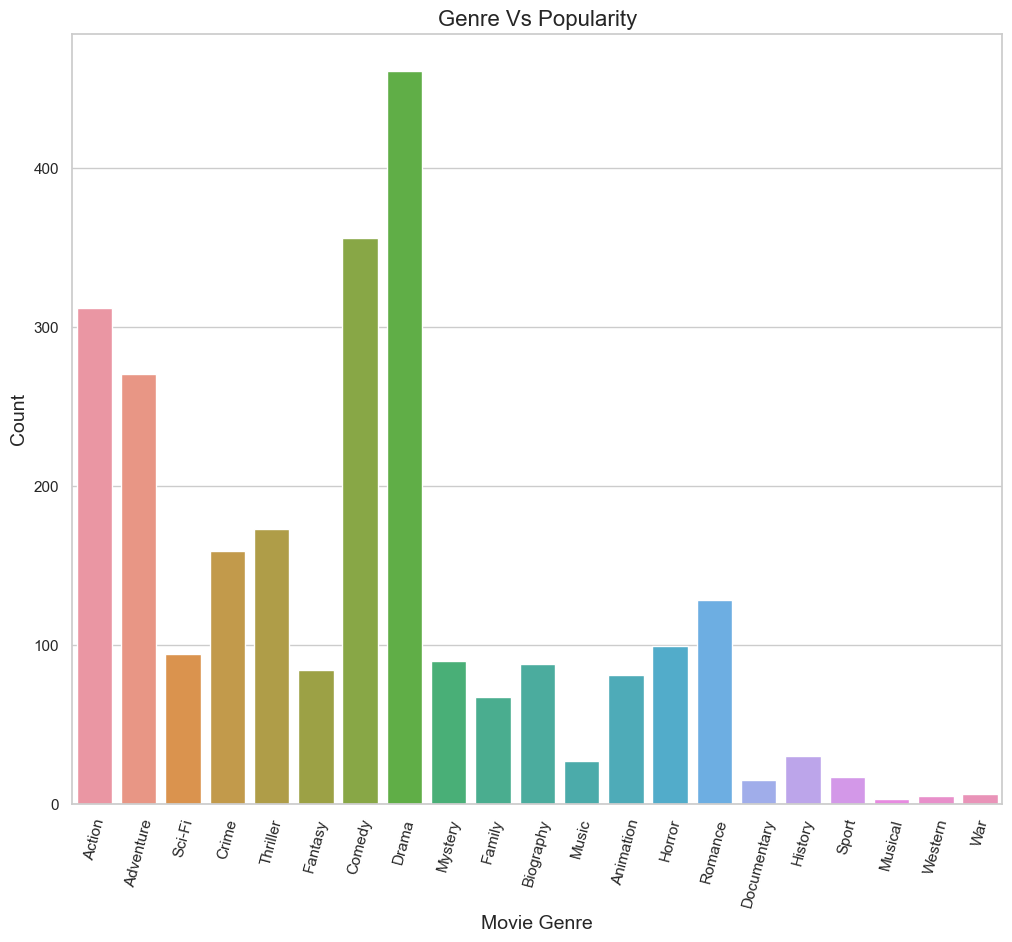

In [322]:
# plotting the data above
fig, ax = plt.subplots(figsize=(12,10))

x = genre
y = count

ax = sns.barplot(x = x, y = y, ax = ax)

ax.set_title('Genre Vs Popularity', fontsize=16)
ax.set_xlabel("Movie Genre",fontsize=14)
ax.set_ylabel("Count", fontsize=14);

ax.set_xticklabels(labels = x, rotation = 75)
fig.savefig('Genres Vs Popularity.png');

From the bar graph,we can say that Drama is the most popular Genre in the movie industry as it has the tallest bar.

In [323]:
# sorting to find the popular movies per vote_average

movie_ratings = final_df.sort_values(by = ['popularity', 'vote_average'],ascending=(False, False)).head(10)
movie_ratings = movie_ratings.sort_values('vote_average',ascending=False).reset_index(drop=True)

In [324]:
# The highly rated movies

movie_ratings.loc[:,['movie','vote_average','studio']]

,movie,vote_average,studio
0,Avengers: Infinity War,8.3,BV
1,Guardians of the Galaxy,7.9,BV
2,Thor: Ragnarok,7.5,BV
3,Blade Runner 2049,7.4,WB
4,Spider-Man: Homecoming,7.4,Sony
5,The Hobbit: The Battle of the Five Armies,7.3,WB (NL)
6,Avengers: Age of Ultron,7.3,BV
7,John Wick,7.2,LG/S
8,Ant-Man and the Wasp,7.0,BV
9,Fantastic Beasts: The Crimes of Grindelwald,6.9,WB


Most popular studios with high world-wide gross

In [325]:
# sorting values to find movies with the highest grossing

highest_gross = final_df.sort_values('worldwide_gross', ascending = False).head(10)
highest_gross.reset_index(drop=True)

,movie,production_budget,worldwide_gross,profit/loss,profit/loss_percentage,studio,foreign_gross,original_language,popularity,title,vote_average,vote_count,runtime_minutes,genres
0,Avengers: Infinity War,300000000.0,2.048134e+09,1.748134e+09,582.711400,BV,"1,369.5",en,80.773,Avengers: Infinity War,8.3,13948,149.0,"Action,Adventure,Sci-Fi"
1,Jurassic World,215000000.0,1.648855e+09,1.433855e+09,666.909239,Uni.,"1,019.4",en,20.709,Jurassic World,6.6,14056,124.0,"Action,Adventure,Sci-Fi"
2,Avengers: Age of Ultron,330600000.0,1.403014e+09,1.072414e+09,324.384139,BV,946400000,en,44.383,Avengers: Age of Ultron,7.3,13457,141.0,"Action,Adventure,Sci-Fi"
3,Black Panther,200000000.0,1.348258e+09,1.148258e+09,574.129112,BV,646900000,en,2.058,Black Panther,5.1,11,134.0,"Action,Adventure,Sci-Fi"
4,Jurassic World: Fallen Kingdom,170000000.0,1.305773e+09,1.135773e+09,668.101646,Uni.,891800000,en,34.958,Jurassic World: Fallen Kingdom,6.5,5995,128.0,"Action,Adventure,Sci-Fi"
5,Frozen,150000000.0,1.272470e+09,1.122470e+09,748.313273,BV,875700000,en,9.678,Frozen,5.8,987,93.0,"Adventure,Drama,Sport"
6,Incredibles 2,200000000.0,1.242521e+09,1.042521e+09,521.260356,BV,634200000,en,36.286,Incredibles 2,7.6,6354,118.0,"Action,Adventure,Animation"
7,The Fate of the Furious,250000000.0,1.234846e+09,9.848463e+08,393.938507,Uni.,"1,010.0",en,28.668,The Fate of the Furious,6.9,6335,136.0,"Action,Crime,Thriller"
8,Minions,74000000.0,1.160336e+09,1.086336e+09,1468.021855,Uni.,823400000,en,9.338,Minions,6.4,7343,91.0,"Adventure,Animation,Comedy"
9,Aquaman,160000000.0,1.146895e+09,9.868946e+08,616.809150,WB,812700000,en,38.102,Aquaman,6.8,6155,143.0,"Action,Adventure,Fantasy"


In [326]:
final_df['studio'].unique()

array(['BV', 'WB', 'Sony', 'WB (NL)', 'Uni.', 'Par.', 'Fox', 'P/DW',
       'STX', 'LGF', 'LG/S', 'TriS', 'Wein.', 'MBox', 'Free', 'Rela.',
       'EOne', 'FD', 'ORF', 'Sum.', 'SGem', 'Focus', 'Annapurna',
       'W/Dim.', 'Studio 8', 'MGM', 'MNE', 'Strand', 'CBS', 'IFC', 'RTWC',
       'FoxS', 'RAtt.', 'SPC', 'GrtIndia', 'BST', 'VE', 'EC', 'BG',
       'Over.', 'A24', 'Amazon', 'OMNI/FSR', 'Magn.', 'Mira.', 'CE',
       'Global Road', 'ATO', 'FCW', 'Neon', 'ParV', 'LD', 'Gold.', 'App.',
       'Relbig.', 'Osci.', 'Jan.', 'Affirm', '3D', 'BH Tilt', 'P4',
       'Drft.', 'Viv.', 'PFR', 'Anch.', 'DR'], dtype=object)

In [327]:
# movies with the highest gross
highest_gross.loc[:,['movie','worldwide_gross']]

,movie,worldwide_gross
2,Avengers: Infinity War,2.048134e+09
23,Jurassic World,1.648855e+09
1,Avengers: Age of Ultron,1.403014e+09
45,Black Panther,1.348258e+09
106,Jurassic World: Fallen Kingdom,1.305773e+09
140,Frozen,1.272470e+09
47,Incredibles 2,1.242521e+09
17,The Fate of the Furious,1.234846e+09
357,Minions,1.160336e+09
124,Aquaman,1.146895e+09


C:\Users\user\AppData\Local\Temp\ipykernel_10512\1409888133.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(labels = y,fontsize=14)


(4.5, 8.5)

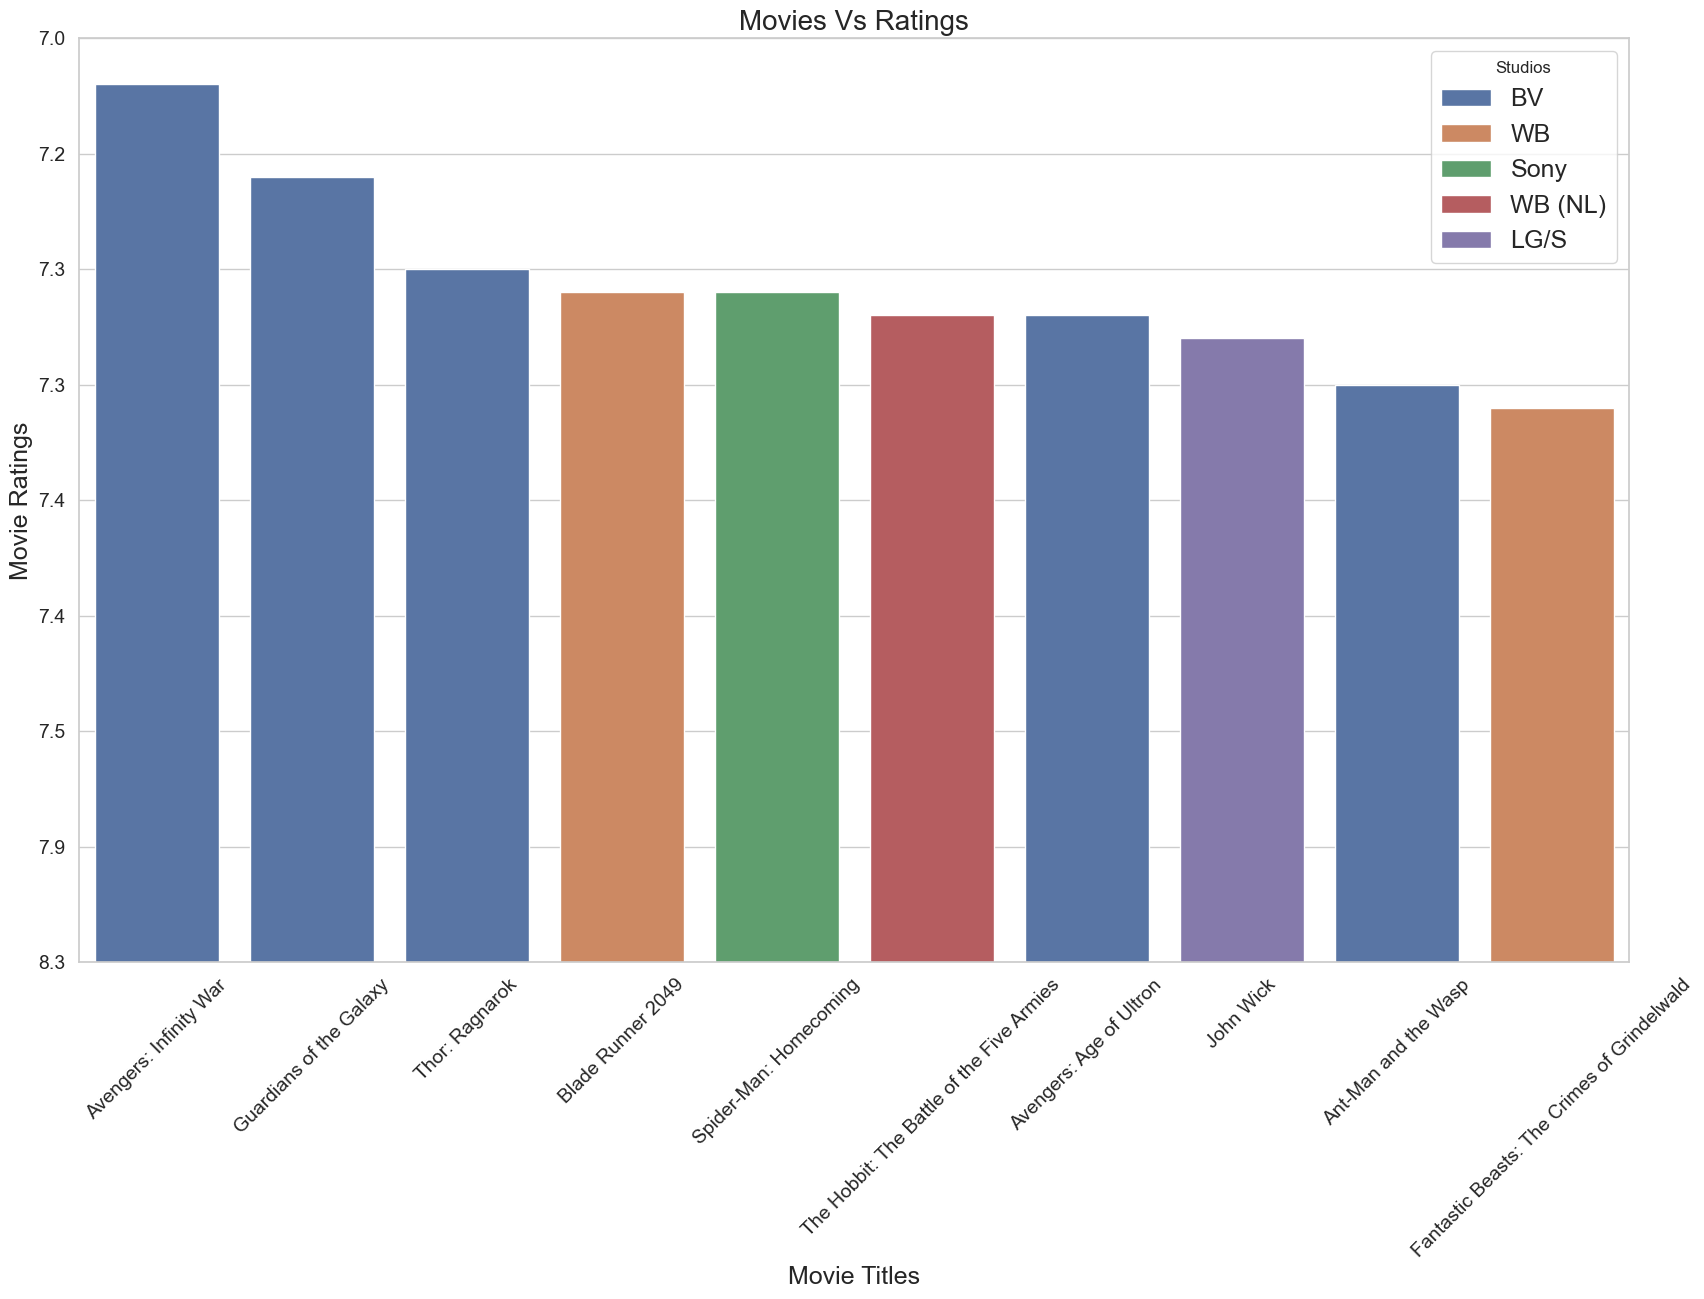

In [328]:
# plotting the data above

fig, ax1= plt.subplots(figsize=(20,12))

x = list(movie_ratings['movie'].values)
y = movie_ratings['vote_average']

ax1 = sns.barplot(data = movie_ratings, x = 'movie', y = 'vote_average', hue = 'studio', ax = ax1, dodge=False)

ax1.set_title('Movies Vs Ratings', fontsize=20)
ax1.set_xlabel("Movie Titles",fontsize=18)
ax1.set_ylabel("Movie Ratings", fontsize=18)
ax1.legend(title='Studios', fontsize=18, loc=1)
ax1.set_xticklabels(labels = x, rotation = 60,fontsize=14)
ax1.set_yticklabels(labels = y,fontsize=14)

ax1.set_xticklabels(labels = x, rotation = 45)
ax1.set_ylim(4.5, 8.5)

From the bar graph we can see that BV studios has highly rated movies, with the top two movies being Avengers and Thor.

C:\Users\user\AppData\Local\Temp\ipykernel_10512\1602094666.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(labels = y,fontsize=14)


[Text(0, 0.0, '8.3'),
 Text(0, 250000000.0, '7.9'),
 Text(0, 500000000.0, '7.5'),
 Text(0, 750000000.0, '7.4'),
 Text(0, 1000000000.0, '7.4'),
 Text(0, 1250000000.0, '7.3'),
 Text(0, 1500000000.0, '7.3'),
 Text(0, 1750000000.0, '7.2'),
 Text(0, 2000000000.0, '7.0'),
 Text(0, 2250000000.0, '6.9')]

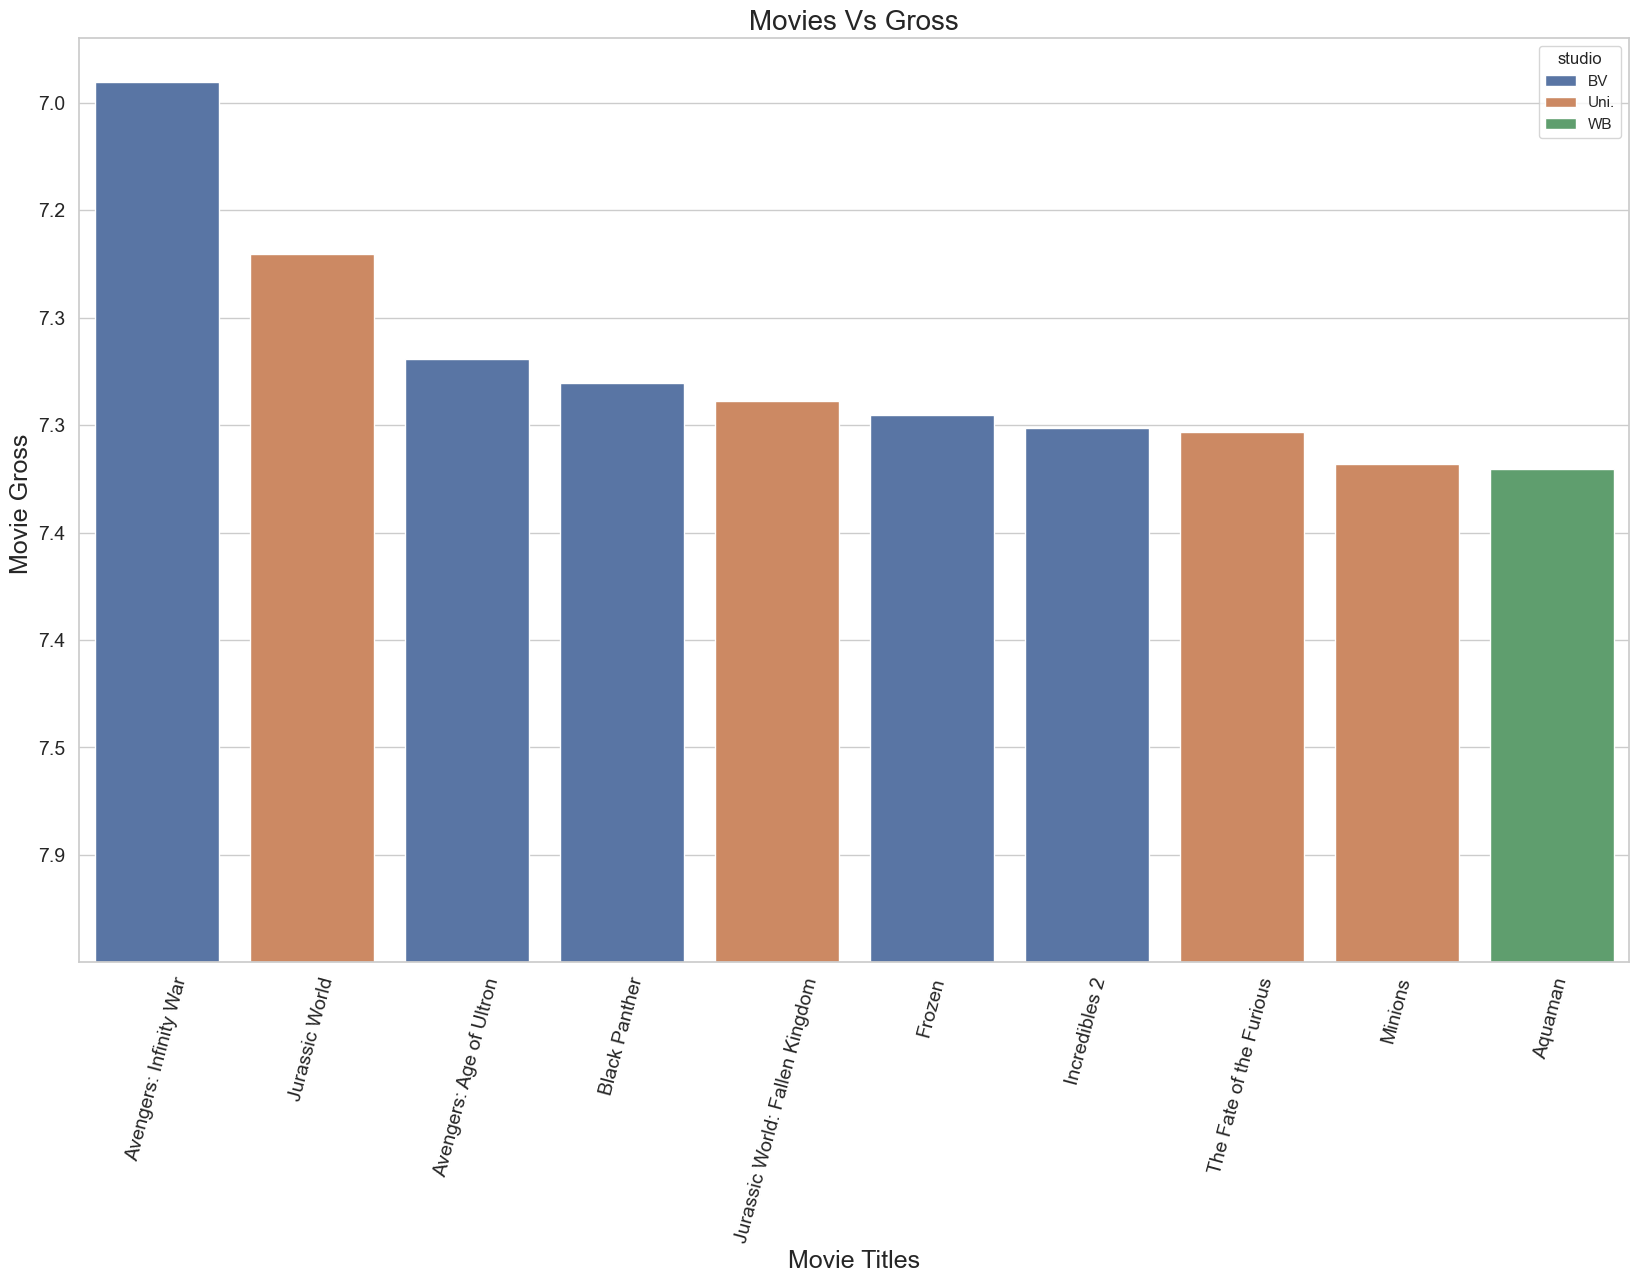

In [329]:
fig, ax2= plt.subplots(figsize=(20,12))
ax2 = sns.barplot(data = highest_gross, x = 'movie', y = 'worldwide_gross',hue = 'studio', ax = ax2, dodge=False)

labels = list(highest_gross['movie'])
ax2.set_title('Movies Vs Gross', fontsize=20)
ax2.set_xlabel("Movie Titles",fontsize=18)
ax2.set_ylabel("Movie Gross ", fontsize=18)
ax2.set_ylim(1000)

ax2.set_xticklabels(labels = labels, rotation = 75,fontsize=14)
ax2.set_yticklabels(labels = y,fontsize=14)

Can popularity affect ratings

Text(0, 0.5, 'Popularity')

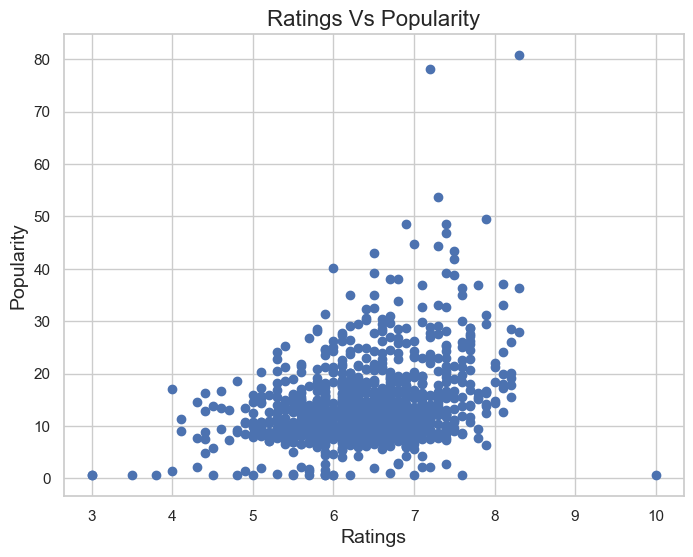

In [330]:
# plotting a scatterplot

fig, ax= plt.subplots(figsize=(8,6))

x = final_df['vote_average']
y = final_df['popularity']

ax.scatter(x,y)

ax.set_title('Ratings Vs Popularity', fontsize=16)
ax.set_xlabel("Ratings",fontsize=14)
ax.set_ylabel("Popularity", fontsize=14)